In [15]:
import requests
import json

def analyzeText(url):
    api_url = "http://gateway-a.watsonplatform.net/calls/url/URLGetRankedNamedEntities"
    api_key = '4b46c7859a7be311b6f9389b12504e302cac0a55'
    headers = {
        "Accept": "application/json"
    }
    parameters = {
        'outputMode': 'json',
        'apikey' : api_key,
        'sentiment' : 1,
        'knowledgeGraph': 1,
        'url': url,
        'disambiguate': 1
    }
    resp = requests.post(api_url, params=parameters, headers=headers)
    data = json.loads(resp.text)
    
    return data


In [27]:
text_url = 'https://www.washingtonpost.com/politics/rubio-endures-an-assault-in-a-rollicking-republican-debate/2016/02/06/d8a9bd60-cc5b-11e5-a7b2-5a2f824b02c9_story.html'
text_url = "http://techcrunch.com/2016/04/18/amazon-has-built-a-subscription-launchpad-with-amazon-prime/"
text_url = "http://perureports.com/2016/04/12/peru-two-americans-die-fire-amazon-river-cruise/"
results = analyzeText(text_url) 

In [28]:
results.keys()

results

{u'entities': [{u'count': u'2',
   u'knowledgeGraph': {u'typeHierarchy': u'/products/tools/hammers/christy hammer'},
   u'relevance': u'0.907536',
   u'sentiment': {u'score': u'-0.468218', u'type': u'negative'},
   u'text': u'Christy Hammer',
   u'type': u'Person'},
  {u'count': u'2',
   u'disambiguated': {u'dbpedia': u'http://dbpedia.org/resource/Amazon_River',
    u'freebase': u'http://rdf.freebase.com/ns/m.0sd7',
    u'name': u'Amazon River',
    u'opencyc': u'http://sw.opencyc.org/concept/Mx4rvVjR_5wpEbGdrcN5Y29ycA',
    u'yago': u'http://yago-knowledge.org/resource/Amazon_River'},
   u'knowledgeGraph': {u'typeHierarchy': u'/issues/natural resources/waterways/rivers/amazon river'},
   u'relevance': u'0.861415',
   u'sentiment': {u'type': u'neutral'},
   u'text': u'Amazon river',
   u'type': u'GeographicFeature'},
  {u'count': u'2',
   u'knowledgeGraph': {u'typeHierarchy': u'/products/tools/hammers/larry hammer'},
   u'relevance': u'0.777981',
   u'sentiment': {u'type': u'neutral'},

In [29]:
results["entities"]

[{u'count': u'2',
  u'knowledgeGraph': {u'typeHierarchy': u'/products/tools/hammers/christy hammer'},
  u'relevance': u'0.907536',
  u'sentiment': {u'score': u'-0.468218', u'type': u'negative'},
  u'text': u'Christy Hammer',
  u'type': u'Person'},
 {u'count': u'2',
  u'disambiguated': {u'dbpedia': u'http://dbpedia.org/resource/Amazon_River',
   u'freebase': u'http://rdf.freebase.com/ns/m.0sd7',
   u'name': u'Amazon River',
   u'opencyc': u'http://sw.opencyc.org/concept/Mx4rvVjR_5wpEbGdrcN5Y29ycA',
   u'yago': u'http://yago-knowledge.org/resource/Amazon_River'},
  u'knowledgeGraph': {u'typeHierarchy': u'/issues/natural resources/waterways/rivers/amazon river'},
  u'relevance': u'0.861415',
  u'sentiment': {u'type': u'neutral'},
  u'text': u'Amazon river',
  u'type': u'GeographicFeature'},
 {u'count': u'2',
  u'knowledgeGraph': {u'typeHierarchy': u'/products/tools/hammers/larry hammer'},
  u'relevance': u'0.777981',
  u'sentiment': {u'type': u'neutral'},
  u'text': u'Larry Hammer',
  u't

In [30]:
import pandas
from pandas.io.json import json_normalize

df = json_normalize(results["entities"])
df.head(100)

,count,disambiguated.dbpedia,disambiguated.freebase,disambiguated.geo,disambiguated.geonames,disambiguated.name,disambiguated.opencyc,disambiguated.subType,disambiguated.website,disambiguated.yago,knowledgeGraph.typeHierarchy,relevance,sentiment.score,sentiment.type,text,type
0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/products/tools/hammers/christy hammer,0.907536,-0.468218,negative,Christy Hammer,Person
1,2,http://dbpedia.org/resource/Amazon_River,http://rdf.freebase.com/ns/m.0sd7,NaN,NaN,Amazon River,http://sw.opencyc.org/concept/Mx4rvVjR_5wpEbGd...,NaN,NaN,http://yago-knowledge.org/resource/Amazon_River,/issues/natural resources/waterways/rivers/ama...,0.861415,NaN,neutral,Amazon river,GeographicFeature
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/products/tools/hammers/larry hammer,0.777981,NaN,neutral,Larry Hammer,Person
3,2,http://dbpedia.org/resource/Iquitos,http://rdf.freebase.com/ns/m.02v7h6,-3.75 -73.25,http://sws.geonames.org/3696183/,Iquitos,NaN,[],http://www.munimaynas.gob.pe,http://yago-knowledge.org/resource/Iquitos,/cities/iquitos,0.758911,-0.676483,negative,Iquitos,City
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.454934,NaN,neutral,Amazon,Company
5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/places/countries/peru/buenos dias peru,0.443295,-0.27283,negative,Buenos Dias Peru,Facility
6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/people/estrella amazonica,0.417322,NaN,neutral,Estrella Amazonica,GeographicFeature
7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/organizations/companies/national/pacaya-samir...,0.368832,NaN,neutral,Pacaya-Samiria National Reserve,Organization
8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/organizations/groups/subjects/statistics/inte...,0.299295,-0.27283,negative,International Expeditions,Company
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/people/official,0.260888,-0.676483,negative,official,JobTitle


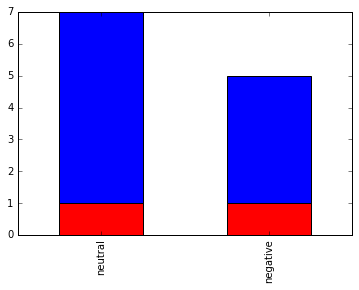

In [31]:
%matplotlib inline
plot1 = df["sentiment.type"].value_counts().plot(kind='bar')
isPerson = (df.type == 'Person')
persons = df[isPerson]
persons["sentiment.type"].value_counts().plot(kind='bar', color='Red', ax=plot1)

In [ ]:
df.dtypes

In [ ]:
df["count"] = pandas.to_numeric(df["count"])
df["relevance"] = pandas.to_numeric(df["relevance"])
df["sentiment.score"] = pandas.to_numeric(df["sentiment.score"])

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
df["count"].hist()

In [ ]:
df["relevance"].hist()

In [ ]:
df["sentiment.score"].hist()

In [ ]:
# And not let's rewrite our function to return directly a dataframe

import requests
import json
import pandas
from pandas.io.json import json_normalize


def analyzeText2(url):
    api_url = "http://gateway-a.watsonplatform.net/calls/url/URLGetRankedNamedEntities"
    api_key = '3d0b6858f7ef32fdf27ad402f4a9c270c9685d84'
    headers = {
        "Accept": "application/json"
    }
    parameters = {
        'outputMode': 'json',
        'apikey' : api_key,
        'sentiment' : 1,
        'knowledgeGraph': 1,
        'url': url,
        'disambiguate': 1
    }
    resp = requests.post(api_url, params=parameters, headers=headers)
    data = json.loads(resp.text)
    
    # We get only the "entities" list since it contains
    # the data that we care about
    df = json_normalize(data["entities"])
    
    # We do a little bit of housecleaning and define 
    # proper data types for the data frame column
    df["count"] = pandas.to_numeric(df["count"])
    df["relevance"] = pandas.to_numeric(df["relevance"])
    df["sentiment.score"] = pandas.to_numeric(df["sentiment.score"])
    
    # We limit the results to be only entities of type person
    isPerson = (df["type"] == 'Person')
    persons = df[isPerson]
    
    results = persons.drop('type', axis=1)
    
    return results

In [ ]:
text_url = 'http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0'
results = analyzeText2(text_url) 

results

In [ ]:
results["sentiment.score"].hist()


In [ ]:
results["sentiment.score"].plot(kind='kde')

In [ ]:
plt1 = results["relevance"].plot(kind='kde')
results["relevance"].hist(ax=plt1)

### Database integration

Now we will work towards building a database for storing the results that we get back from the Alchemy API.

In [ ]:
import MySQLdb as mdb
import sys

# Connect to the MySQL database
con = mdb.connect(host = 'localhost', 
                  user = 'root', 
                  passwd = 'dwdstudent2015', 
                  charset='utf8', use_unicode=True);

# Query to create a database
db_name = 'News'
create_db_query = "CREATE DATABASE IF NOT EXISTS {0} DEFAULT CHARACTER SET 'utf8'".format(db_name)

# Create a database
cursor = con.cursor()
cursor.execute(create_db_query)
cursor.close()

In [ ]:
# Now we will create a table to store the URLs and the entities
# extracted from these URLs

cursor = con.cursor()
table_name = 'Entities'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS {0}.{1} 
                                (url varchar(250), 
                                entity varchar(250),
                                count varchar(250),
                                relevance varchar(250),
                                sentiment varchar(250)
                                )'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [ ]:
# This is the query template for entering entities, URLs, and other
# data into our database

def insertInDB(url):
    query_template = '''INSERT INTO 
        News.Entities(url, entity, count, relevance, sentiment) 
        VALUES (%s, %s, %s, %s, %s)'''

    cursor = con.cursor()
    
    # We get the entities from Alchemy API
    # in the form of a DataFrame
    results = analyzeText2(url) 
    
    # We iterate over the rows of the Dataframe
    # using the iterrows() command.
    for i, row in results.iterrows():
        # The row variable contains the elements of a row
        # and each field is accessible as in dictionaries
        entity = str(row["text"])
        count = str(row["count"])
        relevance = str(row["relevance"])
        sentiment = str(row["sentiment.score"])
        print (url, entity, count, relevance, sentiment)

        query_parameters = (url, entity, count, relevance, sentiment)
        cursor.execute(query_template, query_parameters)

    con.commit()
    cursor.close()

In [ ]:
urls = [
 'http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0',
 'http://www.salon.com/2016/02/07/its_almost_over_for_hillary_this_election_is_a_mass_insurrection_against_a_rigged_system/',
 'http://www.cnn.com/2016/02/07/politics/new-hampshire-2016-candidates-primary-state-of-the-union/',
 'https://www.washingtonpost.com/politics/why-wont-clinton-release-the-transcripts-of-those-paid-speeches/2016/02/07/e76bdea0-cdc3-11e5-b2bc-988409ee911b_story.html'   
 'http://www.nbcnews.com/storyline/flint-water-crisis/hillary-clinton-what-happened-flint-immoral-n513296'
]

for url in urls:
    insertInDB(url)

In [ ]:
import pandas as pd

cur = con.cursor(mdb.cursors.DictCursor)
cur.execute("SELECT * FROM News.Entities")
rows = cur.fetchall()
df_from_sql = pd.DataFrame(list(rows))
df_from_sql